In [1]:
import  os
import sys
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import json
project_dir = str(Path(os.getcwd()).resolve())
sys.path.append(project_dir)

2024-09-24 16:47:01.007537: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-24 16:47:01.058445: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 16:47:01.058472: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 16:47:01.059472: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 16:47:01.065368: I tensorflow/core/platform/cpu_feature_guar

### Target Tracking Problem

In [2]:
# os.makedirs(os.path.join(os.getcwd(), 'Data/Target_Tracking'))

In [3]:
data_path = os.path.join(os.getcwd(), 'Data/Target_Tracking')
parameter_path = os.path.join(os.getcwd(), 'Data/Parameters/')

In [4]:
model_parameters = {
    'model_type' : 'Target_Tracking',
    'T' : 2.0,
    'delta_t' : 0.01,
    'NUM_PATH' : 1e4,
    'DIM' : 4,
    'OBV_DIM' : 2,
    'random_seed' : 0,
    'obv_pos' : (0.0, 0.0),
}
with open(os.path.join(parameter_path, 'Target_Tracking_dim_4_config.json'), 'w') as fp:
    json.dump(model_parameters, fp, indent=4)

In [5]:
tf.constant([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [1.0, 0.0, 1.0, 0.0], [0.0, 1.0, 0.0, 1.0]])

2024-09-24 16:47:03.859282: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 33369 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:ca:00.0, compute capability: 8.0


<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 1., 0.],
       [0., 1., 0., 1.]], dtype=float32)>

In [6]:
tf.math.atan(tf.repeat(tf.linalg.diag([[0.1, 0.1, 0.05, 0.05]]), 10, axis=0))

<tf.Tensor: shape=(10, 4, 4), dtype=float32, numpy=
array([[[0.09966865, 0.        , 0.        , 0.        ],
        [0.        , 0.09966865, 0.        , 0.        ],
        [0.        , 0.        , 0.0499584 , 0.        ],
        [0.        , 0.        , 0.        , 0.0499584 ]],

       [[0.09966865, 0.        , 0.        , 0.        ],
        [0.        , 0.09966865, 0.        , 0.        ],
        [0.        , 0.        , 0.0499584 , 0.        ],
        [0.        , 0.        , 0.        , 0.0499584 ]],

       [[0.09966865, 0.        , 0.        , 0.        ],
        [0.        , 0.09966865, 0.        , 0.        ],
        [0.        , 0.        , 0.0499584 , 0.        ],
        [0.        , 0.        , 0.        , 0.0499584 ]],

       [[0.09966865, 0.        , 0.        , 0.        ],
        [0.        , 0.09966865, 0.        , 0.        ],
        [0.        , 0.        , 0.0499584 , 0.        ],
        [0.        , 0.        , 0.        , 0.0499584 ]],

       [[0.0

In [7]:
tf.repeat(tf.linalg.diag([[0.1, 0.1, 0.05, 0.05]]), 10, axis=0)

<tf.Tensor: shape=(10, 4, 4), dtype=float32, numpy=
array([[[0.1 , 0.  , 0.  , 0.  ],
        [0.  , 0.1 , 0.  , 0.  ],
        [0.  , 0.  , 0.05, 0.  ],
        [0.  , 0.  , 0.  , 0.05]],

       [[0.1 , 0.  , 0.  , 0.  ],
        [0.  , 0.1 , 0.  , 0.  ],
        [0.  , 0.  , 0.05, 0.  ],
        [0.  , 0.  , 0.  , 0.05]],

       [[0.1 , 0.  , 0.  , 0.  ],
        [0.  , 0.1 , 0.  , 0.  ],
        [0.  , 0.  , 0.05, 0.  ],
        [0.  , 0.  , 0.  , 0.05]],

       [[0.1 , 0.  , 0.  , 0.  ],
        [0.  , 0.1 , 0.  , 0.  ],
        [0.  , 0.  , 0.05, 0.  ],
        [0.  , 0.  , 0.  , 0.05]],

       [[0.1 , 0.  , 0.  , 0.  ],
        [0.  , 0.1 , 0.  , 0.  ],
        [0.  , 0.  , 0.05, 0.  ],
        [0.  , 0.  , 0.  , 0.05]],

       [[0.1 , 0.  , 0.  , 0.  ],
        [0.  , 0.1 , 0.  , 0.  ],
        [0.  , 0.  , 0.05, 0.  ],
        [0.  , 0.  , 0.  , 0.05]],

       [[0.1 , 0.  , 0.  , 0.  ],
        [0.  , 0.1 , 0.  , 0.  ],
        [0.  , 0.  , 0.05, 0.  ],
        [0.  , 0. 

In [8]:

os.environ['PYTHONPATH'] = os.getcwd()
    # "/home/xim22003/Deep_FBSDE_Filtering" 
                            # + os.environ.get('PYTHONPATH', ''))

print("PYTHONPATH:", os.environ['PYTHONPATH'])
# 
# if "/home/xim22003/Deep_FBSDE_Filtering" not in sys.path:
#     sys.path.insert(0, "/home/xim22003/Deep_FBSDE_Filtering")

PYTHONPATH: /home/xim22003/Deep_FBSDE_Filtering


In [9]:
! python3 Data/Target_Tracking.py Data/Parameters/Target_Tracking_dim_4_config.json

2024-09-24 16:47:04.776508: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 16:47:04.776549: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 16:47:04.777531: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 16:47:05.823007: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Config file of Target_Tracking loading succesfully!
/home/xim22003/Deep_FBSDE_Filtering
Using score function method!
(10000, 201, 4)
(10000, 200, 2)


In [48]:
X= tf.constant(np.random.normal(size=[10, 4]), dtype=tf.float32)

In [49]:

a = tf.expand_dims(tf.math.atan((X[:, 1] - 0) / (X[:, 0] - 4)), axis=-1)
b = tf.expand_dims(tf.math.sqrt(tf.math.square(X[:, 0] - 0) + tf.math.square(X[:, 1] - 0) ), axis=-1)

In [50]:
tf.einsum('ij, jk->ik', tf.concat([a, b], axis=-1), tf.linalg.diag([100.0, 10.0]))

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 30.364782 ,  19.93553  ],
       [-26.724895 ,  11.058193 ],
       [-20.43316  ,   8.181973 ],
       [ 45.92577  ,  25.395544 ],
       [-19.551403 ,  13.702855 ],
       [-18.868923 ,   8.524865 ],
       [ 16.357418 ,   6.7415566],
       [ -1.3938564,   8.440365 ],
       [-77.009636 ,  28.236225 ],
       [ 43.387585 ,  17.827293 ]], dtype=float32)>

In [10]:
obv_data = np.load("Data/Target_Tracking/Target_Tracking_Target_Tracking_dim_4_config_obv.npy")
sig_data = np.load("Data/Target_Tracking/Target_Tracking_Target_Tracking_dim_4_config_signal.npy")

In [14]:
obv_data

array([[[ 0.0000000e+00,  0.0000000e+00],
        [ 1.0027434e+00,  2.5858054e-02],
        [ 1.8457490e+00,  4.1475713e-02],
        ...,
        [ 1.9571136e+02,  2.3708017e+00],
        [ 1.9681229e+02,  2.3653064e+00],
        [ 1.9808052e+02,  2.2858882e+00]],

       [[ 0.0000000e+00,  0.0000000e+00],
        [ 8.9734769e-01, -2.5219908e-02],
        [ 1.9775695e+00, -1.9102573e-02],
        ...,
        [ 1.9558754e+02,  1.9444894e+00],
        [ 1.9667087e+02,  1.9612339e+00],
        [ 1.9771100e+02,  1.9260824e+00]],

       [[ 0.0000000e+00,  0.0000000e+00],
        [ 9.2910045e-01, -5.2089598e-02],
        [ 1.6784949e+00,  9.5558971e-02],
        ...,
        [ 2.0155266e+02,  3.0144815e+00],
        [ 2.0276935e+02,  2.9566836e+00],
        [ 2.0402728e+02,  2.9115052e+00]],

       ...,

       [[ 0.0000000e+00,  0.0000000e+00],
        [ 8.7542075e-01, -9.4635405e-02],
        [ 1.9584770e+00, -1.2948072e-01],
        ...,
        [ 2.0077986e+02,  2.1751351e+00],
     

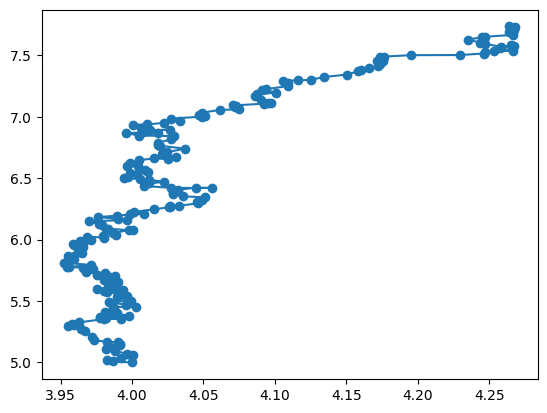

In [12]:
i = 10
plt.scatter(sig_data[i][:, 0], sig_data[i][:, 1], )
plt.plot(sig_data[i][:, 0], sig_data[i][:, 1], )

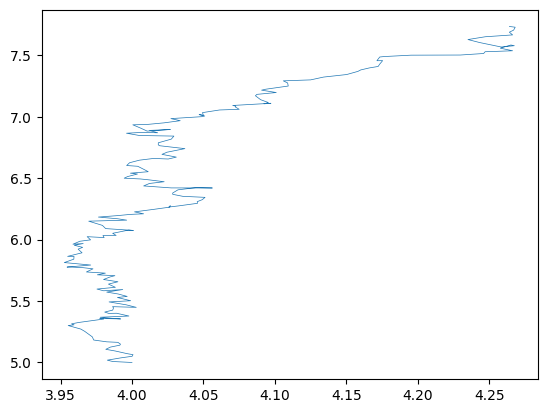

In [13]:
plt.plot(sig_data[i][:, 0], sig_data[i][:, 1], linewidth=0.5)

### Training Data Analysis

In [18]:
os.path.join(os.getcwd(), 'Deep_FBSDE_Filtering/Result/Double_Well_dim_1_gaussian_init_config')

'/home/xim22003/Deep_FBSDE_Filtering/Deep_FBSDE_Filtering/Result/Double_Well_dim_1_gaussian_init_config'

In [19]:
plt.plot(np.load(os.path.join(os.path.join(os.getcwd(), 'Result/Double_Well_dim_1_gaussian_init_config'), 'loss_1.npy'))[:, 2])
# plt.plot(np.load('test_loss.npy'))
plt.savefig('nn_output.png')

ValueError: Cannot load file containing pickled data when allow_pickle=False

In [15]:
np.load(os.path.join(os.path.join(os.getcwd(), 'Result/Double_Well_dim_1_gaussian_init_config'), 'loss.npy'))[3970:, 2]

array([0.26433727, 0.21038553, 0.47307944, 0.21241982, 0.18156466,
       0.3611075 , 0.22445664, 0.24629937, 0.37862152, 0.2303179 ,
       0.24510545, 0.245594  , 0.32469723, 0.33660364, 0.30978778,
       0.22155046, 0.17484954, 0.29717106, 0.22416914, 0.23510888,
       0.36283755, 0.18900625, 0.38577238, 0.1947649 , 0.20484333,
       0.32255524, 0.37240386, 0.22952513, 0.28700775, 0.22652297],
      dtype=float32)

In [4]:
np.load(os.path.join(os.path.join(os.getcwd(), 'Result/Double_Well_dim_1_gaussian_init_config'), 'test_loss.npy'))[2950:, 1]

array([-5.6888447, -5.6708384, -5.689554 , ..., -5.7114577, -5.701769 ,
       -5.713736 ], dtype=float32)

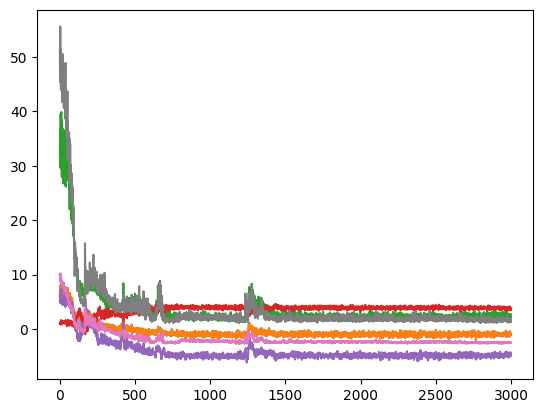

In [18]:
plt.plot(np.load('loss.npy'))
plt.plot(np.load('test_loss.npy'))

In [10]:
tf.random.set_seed(42)
tf.random.normal(shape=[1, 10, 1], mean=0.0, stddev=1.0, seed=0)

2024-05-23 09:07:34.488323: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38372 MB memory:  -> device: 0, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:25:00.0, compute capability: 8.0
2024-05-23 09:07:34.488892: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38372 MB memory:  -> device: 1, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:81:00.0, compute capability: 8.0
2024-05-23 09:07:34.489317: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1929] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 38372 MB memory:  -> device: 2, name: NVIDIA A100-PCIE-40GB, pci bus id: 0000:e2:00.0, compute capability: 8.0


<tf.Tensor: shape=(1, 10, 1), dtype=float32, numpy=
array([[[-0.30101568],
        [ 0.51859164],
        [-0.15693977],
        [-1.1760874 ],
        [ 0.2227503 ],
        [-0.7936496 ],
        [-1.308642  ],
        [-1.5902402 ],
        [ 0.20617193],
        [ 0.54510194]]], dtype=float32)>

In [11]:
# 设置环境变量
os.environ['PYTHONPATH'] = os.getcwd()
    # "/home/xim22003/Deep_FBSDE_Filtering" 
                            # + os.environ.get('PYTHONPATH', ''))

# 确认是否添加成功
print("PYTHONPATH:", os.environ['PYTHONPATH'])
# 
# # 添加到 sys.path 如果需要在Notebook中直接导入模块
# if "/home/xim22003/Deep_FBSDE_Filtering" not in sys.path:
#     sys.path.insert(0, "/home/xim22003/Deep_FBSDE_Filtering")

PYTHONPATH: /home/xim22003/Deep_FBSDE_Filtering


In [31]:
! conda env list

# conda environments:
#
base                     /home/xim22003/miniconda3
VAE_SDE                  /home/xim22003/miniconda3/envs/VAE_SDE
gpu-nn                   /home/xim22003/miniconda3/envs/gpu-nn
myenv                    /home/xim22003/miniconda3/envs/myenv
nn                       /home/xim22003/miniconda3/envs/nn
tensorflow_gpu           /home/xim22003/miniconda3/envs/tensorflow_gpu
tf_2.10                  /home/xim22003/miniconda3/envs/tf_2.10
tf_2.12                  /home/xim22003/miniconda3/envs/tf_2.12
tf_2.4                   /home/xim22003/miniconda3/envs/tf_2.4
tf_gpu                   /home/xim22003/miniconda3/envs/tf_gpu
tf_gpu_15             *  /home/xim22003/miniconda3/envs/tf_gpu_15
tfpgu_2.4                /home/xim22003/miniconda3/envs/tfpgu_2.4
torch_gpu                /home/xim22003/miniconda3/envs/torch_gpu
xim                      /home/xim22003/miniconda3/envs/xim



In [12]:
os.getcwd()

'/home/xim22003/Deep_FBSDE_Filtering'

In [13]:
param = {
    'model_type': 'Double_Well',
    'T': 1.00,
    'delta_t': 0.001,
    'NUM_PATH': 1e5,
    'DIM': 1,
    'random_seed': 0,
    'init_mu': [0.25],
    'init_sigma': [0.75],
}
Double_Well_path = os.path.join(os.path.join(os.getcwd(), 'Data/Parameter'),'Double_Well_dim_1_gaussian_init_config.json')
with open(Double_Well_path, 'w') as file:
    json.dump(param, file, indent=4)

In [14]:
! python3 Data/Double_Well_Model.py Data/Parameter/Double_Well_dim_1_gaussian_init_config.json

2024-05-23 09:07:37.117177: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-23 09:07:37.117243: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-23 09:07:37.118311: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-23 09:07:38.203665: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/xim22003/Deep_FBSDE_Filtering
2024-05-23 09:07:53.222752: W external/local_tsl/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 381.47MiB (rounded to 400000000)requested by op Mul
If the ca

In [15]:
obv_data = np.load("Data/Double_Well/Double_Well_Double_Well_dim_1_gaussian_init_config_obv.npy")
sig_data = np.load("Data/Double_Well/Double_Well_Double_Well_dim_1_gaussian_init_config_signal.npy")

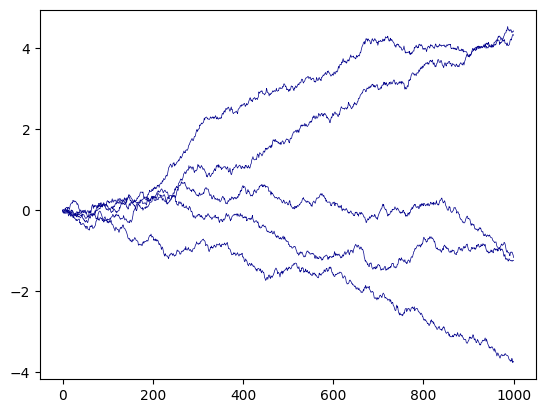

In [15]:
for i in obv_data[:5]:
    plt.plot(i, color='darkblue', linewidth=0.5)
plt.show()

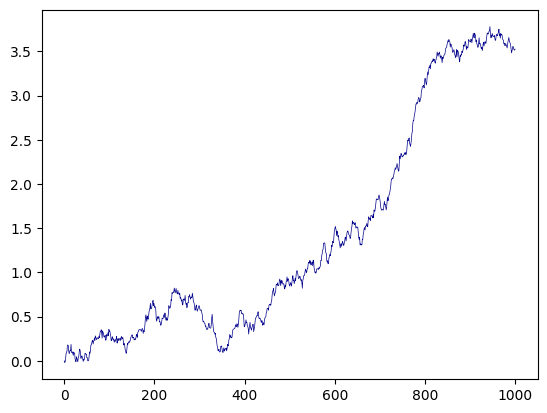

In [28]:
for i in obv_data[5:6]:
    plt.plot(i, color='darkblue', linewidth=0.5)
plt.show()

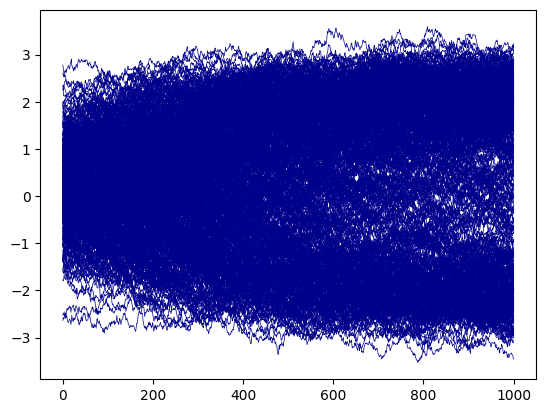

In [16]:
for i in sig_data[5:500]:
    plt.plot(i, color='darkblue', linewidth=0.5)
plt.show()

In [5]:
import json
import os

In [195]:
param = {
    'model_type': 'Double_Well',
    'T': 1.00,
    'delta_t': 0.001,
    'NUM_PATH': 1e3,
    'DIM': 1,
    'random_seed': 0,
    'init_mu': [0.25],
    'init_sigma': [0.75],
}

In [15]:
Linear_dim_1_gaussian_init_param = {
    'model_type': 'Linear',
    'T': 1.00,
    'delta_t': 0.001,
    'NUM_PATH': 1e5,
    'DIM': 1,
    'random_seed': 42,
    'init_mu': [0.25],
    'init_sigma': [0.75],
}
linear_path = os.path.join(os.path.join(os.getcwd(), 'Data/Parameter'),'Linear_dim_1_gaussian_init_config.json')
with open(linear_path, 'w') as file:
    json.dump(Linear_dim_1_gaussian_init_param, file, indent=4)

In [196]:
param

{'model_type': 'Double_Well',
 'T': 1.0,
 'delta_t': 0.001,
 'NUM_PATH': 1000.0,
 'DIM': 1,
 'random_seed': 0,
 'init_mu': [0.25],
 'init_sigma': [0.75]}

In [12]:
Double_Well_path = os.path.join(os.path.join(os.getcwd(), 'Data/Parameter'),'Double_Well_dim_1_gaussian_init_config.json')

In [198]:
with open(test_path, 'w') as file:
    json.dump(param, file, indent=4)

In [13]:
with open(test_path, 'r') as file:
    config = json.load(file)

In [41]:
config['init_mu']

[0.25]

### 1-Dimension Linear Model

In [11]:
! python3 Data/Linear_Model.py Data/Parameter/Linear_dim_1_gaussian_init_config.json

2024-04-29 10:49:04.251063: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-29 10:49:04.251110: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-29 10:49:04.252091: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-29 10:49:05.261310: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/xim22003/Deep_FBSDE_Filtering
(100000, 1001, 1)


In [9]:
linear_obv_data = np.load('Data/Linear/Linear_Linear_dim_1_gaussian_init_config_obv.npy')
linear_sig_data = np.load('Data/Linear/Linear_Linear_dim_1_gaussian_init_config_signal.npy')

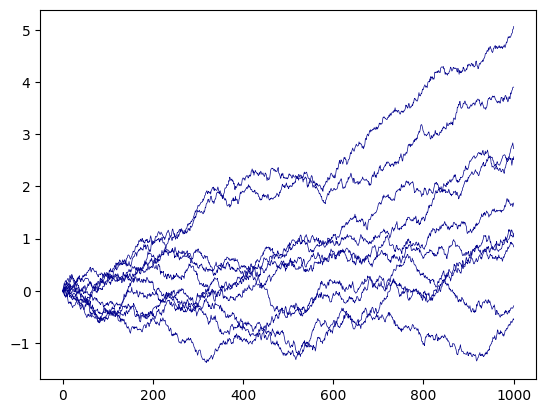

In [3]:
for i in linear_obv_data[:10]:
    plt.plot(i, color='darkblue', linewidth=0.5)
plt.show()

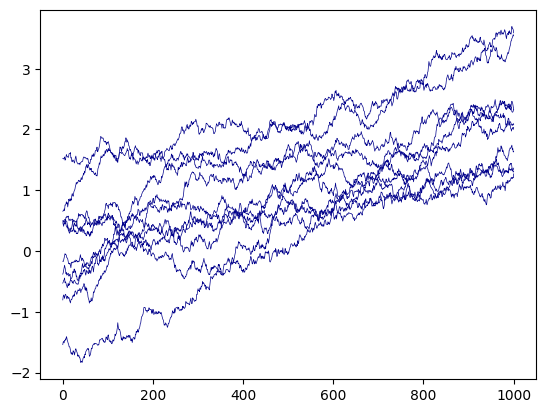

In [4]:
for i in linear_sig_data[:10]:
    plt.plot(i, color='darkblue', linewidth=0.5)
plt.show()

### 1-Dimension Sin Drift Nonlinear Model

In [67]:
Nonlinear_dim_1_gaussian_init_param = {
    'model_type': 'Nonlinear',
    'T': 1.00,
    'delta_t': 0.001,
    'NUM_PATH': 1e3,
    'DIM': 1,
    'random_seed': 42,
    'init_mu': [0.25],
    'init_sigma': [0.25],
}
nonlinear_path = os.path.join(os.path.join(os.getcwd(), 'Data/Parameter'),'Nonlinear_dim_1_gaussian_init_config.json')
with open(nonlinear_path, 'w') as file:
    json.dump(Nonlinear_dim_1_gaussian_init_param, file, indent=4)

In [128]:
! python3 Data/Nonlinear_Model.py Data/Parameter/Nonlinear_dim_1_gaussian_init_config.json

2024-04-28 15:59:03.623240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 15:59:03.623292: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 15:59:03.624371: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-28 15:59:04.600335: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/xim22003/Deep_FBSDE_Filtering
(1000, 1001, 1)


In [129]:
nonlinear_obv_data = np.load('Data/Nonlinear/Nonlinear_Nonlinear_dim_1_gaussian_init_config_obv.npy')
nonlinear_sig_data = np.load('Data/Nonlinear/Nonlinear_Nonlinear_dim_1_gaussian_init_config_signal.npy')

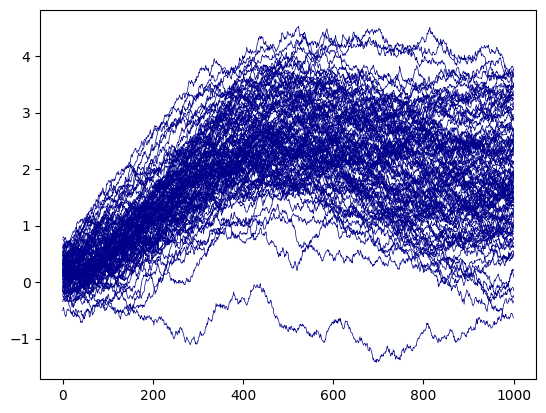

In [130]:
for i in nonlinear_sig_data[:100]:
    plt.plot(i, color='darkblue', linewidth=0.5)
plt.show()

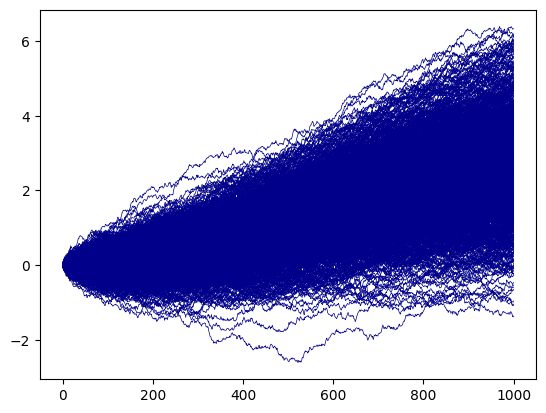

In [131]:
for i in nonlinear_obv_data[:1000]:
    plt.plot(i, color='darkblue', linewidth=0.5)
plt.show()

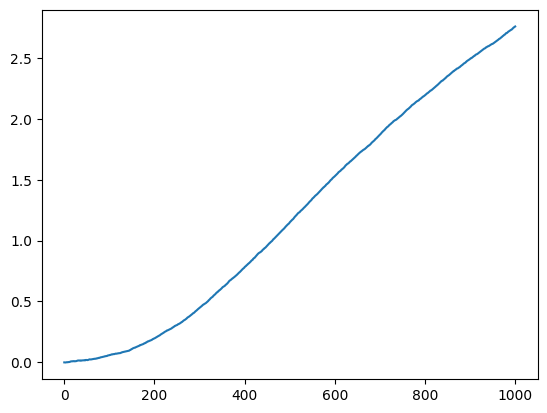

In [132]:
plt.plot(nonlinear_obv_data.mean(axis=0))